In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data  = pd.read_csv("C:/Users/USER/Downloads/Admission_Predict.csv")

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
data.shape

(400, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [16]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [18]:
data.duplicated().sum()

0

In [20]:
data.drop(columns = ['Serial No.'],inplace=True)

In [22]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [26]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [28]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [36]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1
367,311,98,1,1.0,2.5,7.46,0
179,307,102,3,3.0,3.0,8.27,0
27,298,98,2,1.5,2.5,7.50,1
89,316,109,4,4.5,3.5,8.76,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[0.6       , 0.64285714, 1.        , ..., 0.85714286, 0.74264706,
        1.        ],
       [0.42      , 0.21428571, 0.        , ..., 0.28571429, 0.09558824,
        0.        ],
       [0.34      , 0.35714286, 0.5       , ..., 0.42857143, 0.39338235,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [44]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [70]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(1,activation = 'linear'))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [82]:
history = model.fit(X_train_scaled,y_train,epochs = 110,validation_split = 0.2)

Epoch 1/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 2/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 3/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 4/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 5/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 6/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 7/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 8/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 10/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 11/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 12/110
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050 - val_lo

In [84]:
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [86]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7911557425850905

([<matplotlib.axis.YTick at 0x1c6903b9880>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.3, '0.30'),
  Text(0, 0.35, '0.35')])

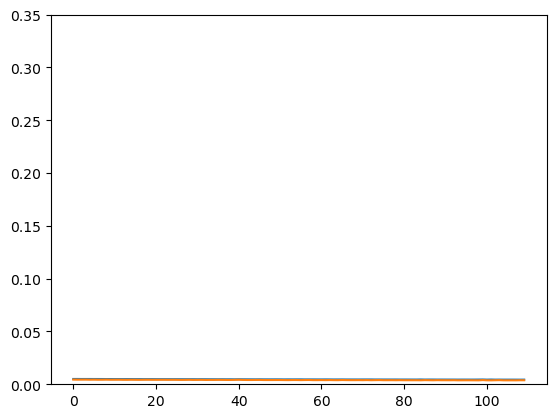

In [92]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35])
